<a href="https://colab.research.google.com/github/arsudsandesh97/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** Sandesh Sundarlal Arsud

# **Project Summary -**

The Rossmann dataset contains 9 columns and 1,017,209 rows of data. This dataset likely pertains to sales at Rossmann drugstores, with columns such as the store number, date, sales, and customer count. To analyze this dataset, one could use exploratory data analysis techniques to gain insight into trends and seasonality in the data. Exponential moving averages could be used to identify trends, while seasonal decomposition could be used to identify seasonal patterns.

Additionally, regression analysis could be performed to predict sales based on the data in the Rossmann dataset. Three types of regression analysis that could be used are linear regression, lasso regression, and ridge regression. Linear regression would be useful for modeling the relationship between sales and one or more predictor variables. Lasso and ridge regression are useful when dealing with datasets that have high levels of multicollinearity, as they can help to identify the most important predictors and prevent overfitting.

The second dataset is the Store dataframe, which has 10 columns and 1115 rows. It is unclear what this dataset pertains to, but it likely contains information about different stores, such as their location, size, and number of employees. Further analysis would be needed to determine the appropriate statistical techniques to use with this dataset.

# **GitHub Link -**

https://github.com/arsudsandesh97/Retail-Sales-Prediction

# **Problem Statement**


The problem at hand is to predict the daily sales of Rossmann drugstores across seven European countries for up to six weeks in advance. This is a challenging task as there are numerous factors that can influence store sales, including promotional activities, competition, holidays, seasonality, and location. Currently, store managers are tasked with predicting sales based on their unique circumstances, resulting in varying levels of accuracy.

To address this issue, historical sales data for 1,115 Rossmann stores has been provided, and the goal is to use this data to forecast the "Sales" column for the test set. It should be noted that some stores in the dataset were temporarily closed for refurbishment, which may have an impact on the accuracy of the predictions.

This problem presents a unique challenge as it requires the development of a forecasting model that can account for the complex and dynamic factors that influence sales at Rossmann drugstores. The successful implementation of such a model could lead to more accurate sales predictions, enabling Rossmann to better plan and allocate resources across its stores 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

ros_df = pd.read_csv('/content/drive/MyDrive/project/Retail Sales Prediction/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/project/Retail Sales Prediction/store.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
ros_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Dataset First Look
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
ros_df.shape

(1017209, 9)

In [ ]:
# Dataset Rows & Columns count
store_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
ros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(ros_df[ros_df.duplicated()])

0

In [ ]:
# Dataset Duplicate Value Count
len(store_df[ros_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
ros_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
ros_df.isnull().columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

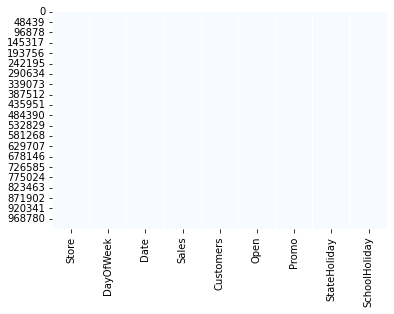

In [ ]:
# Visualizing the missing values
sns.heatmap(ros_df.isnull(), cmap='Blues', cbar=False)

In [ ]:
# Missing Values/Null Values Count
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

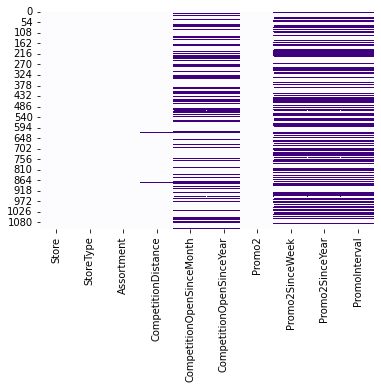

In [ ]:
# Visualizing the missing values
sns.heatmap(store_df.isnull(),cmap='Purples', cbar=False)

### What did you know about your dataset?

* Rossman Dataset : The dataset contains several columns with missing or null values. These columns are 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', and 'SchoolHoliday'.

* Store Dataset : The dataset appears to contain several columns with missing 
values or null values. These columns are 'Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval'.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

ros_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Columns

store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe

ros_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# Dataset Describe

store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

**Rossman Dataset**

* Store : Identifier for each store

* DayOfWeek : The day of the week, with Monday being 1 and Sunday being 7

* Sales : The amount of sales made at the store on that day

* Customers : The number of customers who visited the store on that day

* Open : Indicator of whether the store was open on that day (0 or 1)

* Promo : Indicator of whether there was a promotion taking place at the store on that day (0 or 1)

* SchoolHoliday : Indicator of whether it was a school holiday on that day (0 or 1)



**The statistics provided for each variable are:**

* Count: Total number of records

* Mean: Average value of the variable

* Standard Deviation: Measure of the spread of the variable's values

* Minimum: Smallest value in the variable

* 25th Percentile: Value below which 25% of the variable's values fall

* Median (50th Percentile): Middle value of the variable

* 75th Percentile: Value below which 75% of the variable's values fall

* Maximum: Largest value in the variable




**Store Dataset**

**This data set includes information about different stores, including the following variables:**

* Store: Identifier for each store

* CompetitionDistance: The distance of the nearest competitor from the store

* CompetitionOpenSinceMonth: Month the nearest competitor was opened

* CompetitionOpenSinceYear: Year the nearest competitor was opened

* Promo2: Indicator of whether the store is running a promotion

* Promo2SinceWeek: Week the store started running the promotion

* Promo2SinceYear: Year the store started running the promotion


**The statistics provided give an overview of the distribution of each variable's values.**

* The data for the variables "CompetitionDistance" has a mean of 5404.90, std dev of 7663.17, and a range of 20 to 75860 with 3 missing values.

* "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" have means of 7.22 and 2008.67, std dev of 3.21 and 6.20, and ranges of 1-12 and 1900-2015 with 354 missing values.

* "Promo2" has a mean of 0.51 and no missing values, while "Promo2SinceWeek" and 

* "Promo2SinceYear" have means of 23.60 and 2011.76, std dev of 14.14 and 1.67, and ranges of 1-50 and 2009-2015 with 544 missing values.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in ros_df.columns.tolist():
  print("No. of unique values in ",i,"is",ros_df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


In [ ]:
# Check Unique Values for each variable.

for i in store_df.columns.tolist():
  print("No. of unique values in ",i,"is",store_df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Convert data types for columns as needed
# ros_df['Date'] = pd.to_datetime(ros_df['Date'])
ros_df['StateHoliday'] = ros_df['StateHoliday'].astype('category')



In [ ]:
# Convert data types for columns as needed
store_df['StoreType'] = store_df['StoreType'].astype('category')
store_df['Assortment'] = store_df['Assortment'].astype('category')

In [ ]:
ros_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# extract year, month, day and week of year from "Date"

ros_df['Date']=pd.to_datetime(ros_df['Date'])
ros_df['Year'] = ros_df['Date'].apply(lambda x: x.year)
ros_df['Month'] = ros_df['Date'].apply(lambda x: x.month)

In [ ]:
# Rename columns as needed

ros_df.rename(columns={'CompetitionDistance': 'DistanceToNearestCompetitor',
'CompetitionOpenSinceMonth': 'CompetitorOpenMonth',
'CompetitionOpenSinceYear': 'CompetitorOpenYear'}, inplace=True)

In [ ]:
ros_df = ros_df.drop(['Date'],axis=1)

In [ ]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

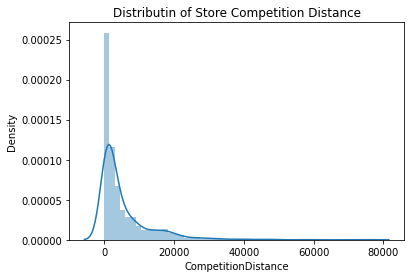

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

### What all manipulations have you done and insights you found?

* In this dataset we have found sales data from 2013 to 2015 

* In this dataset we extracted the 'Year', 'Month', 'Day', and 'WeekOfYear' and created new columns from date column.  

* In this dataset we sorted the values by date and store columns in descending ascending order

* The sales data is for 5 stores and covers the date range from 2015-07-31 to 2015-07-31.

* The stores were open on the day of the sales, and some stores were running promotions.

* It was not a state holiday or a school holiday on the day of the sales.
The data includes sales data for the month of July in the year 2015.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

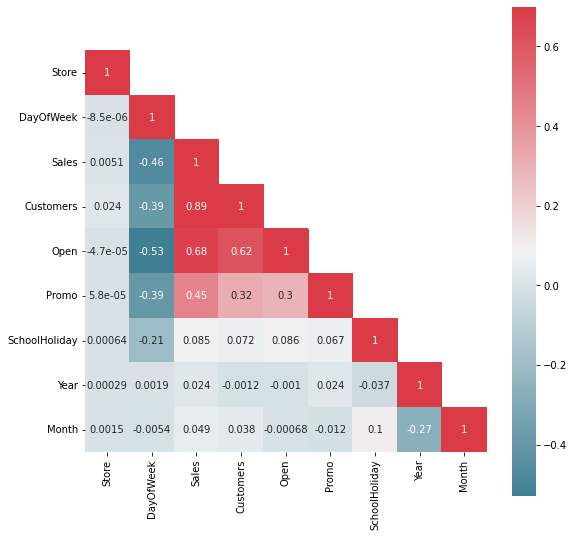

In [ ]:
# Chart - 1 visualization code

correlation_map = ros_df[ros_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_map, mask=obj, vmax=.7, square=True, annot=True, cmap=cmap)


##### 1. Why did you pick the specific chart?

I choosed this chart because The heatmap is a suitable choice for this task because it allows for a quick and intuitive understanding of the strength and direction of the correlation between pairs of variables. The use of colors and annotations in the heatmap further enhances the interpretation of the correlation matrix.

##### 2. What is/are the insight(s) found from the chart?

The insights from a heatmap chart of a correlation matrix can provide valuable information about the relationships between variables in a dataset. By examining the color intensity and values displayed in the grid, one can identify the strengths of the correlations between the variables, with stronger correlations being represented by brighter colors and larger values. However, it is important to keep in mind that correlation does not necessarily imply causation, and that other factors may be at play in determining the relationships between the variables. Nevertheless, analyzing the correlations between variables can be a useful starting point for identifying interesting patterns and relationships in a dataset.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

fig = px.histogram(ros_df, x='DayOfWeek', color='Open')
fig.update_traces(marker_line_width=0.5, opacity=0.7)
fig.update_layout(
    title='Open vs Closed Stores by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Count',
    legend_title='Open',
    barmode='group',
)
fig.show()




##### 1. Why did you pick the specific chart?

histogram with color encoding, which is a useful type of visualization to compare the distribution of a numerical variable across different groups. In this case, the chart is comparing the distribution of store opening and closing by day of the week, which could be useful for understanding patterns of customer demand or store performance.

##### 2. What is/are the insight(s) found from the chart?

insights found from above chart that is the saturday is the day have maximum stores is open after that sunday have less number of store is open

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
custom_colors = ['#0096c7', '#ffcc99']

Promo_sales = pd.DataFrame(ros_df.groupby('Promo').agg({'Sales':'mean'}))

fig = go.Figure(
    data=[go.Bar(x=Promo_sales.index, y=Promo_sales['Sales'], marker_color=custom_colors)],
    layout=go.Layout(
        title='Average Sales by Promo',
        xaxis_title='Promo',
        yaxis_title='Average Sales',
    )
)
fig.show()



##### 1. Why did you pick the specific chart?

A bar chart is a good choice for this type of data because it allows for easy comparison of mean sales across categorical data, while the use of custom colors can enhance visual appeal and highlight important information.

##### 2. What is/are the insight(s) found from the chart?

insight found in above chart is average sales by promo which is sales of 4.406.051 and 1.7.991.152

#### Chart - 4

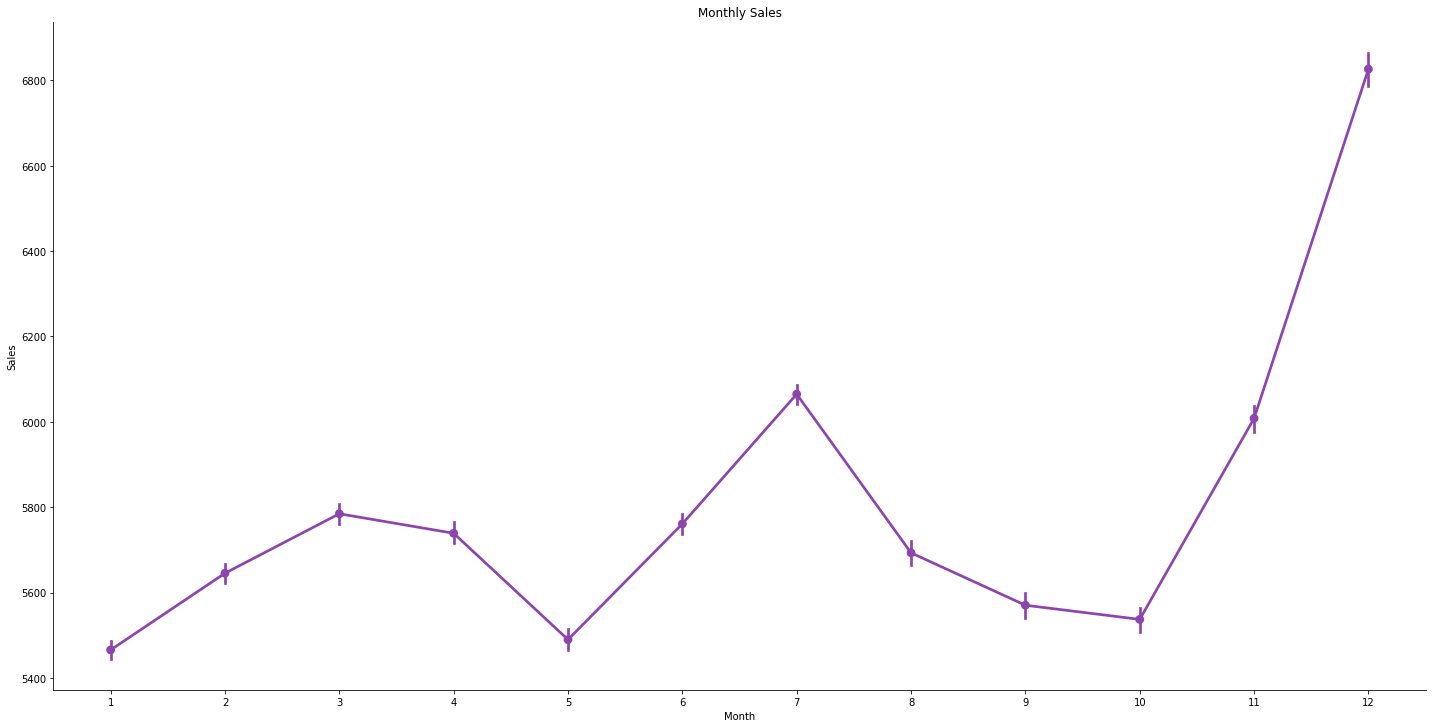

In [ ]:
# Chart - 4 visualization code

custom_palette = ['#8E44AD']
sns.set_palette(custom_palette)

sns.factorplot(x="Month", y="Sales", data=ros_df, kind="point", aspect=2, size=10)

sns.despine()
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()






##### 1. Why did you pick the specific chart?

The factor plot is used because good way to show the relationship between a categorical variable (month) and a continuous variable (sales). Adjusting the plot's size, aspect ratio, and color palette can make it more visually appealing and emphasize the main message of the plot.

##### 2. What is/are the insight(s) found from the chart?

The above chart reveals that the highest number of sales occurred in December, while the lowest number of sales occurred in January and May. 

#### Chart - 5

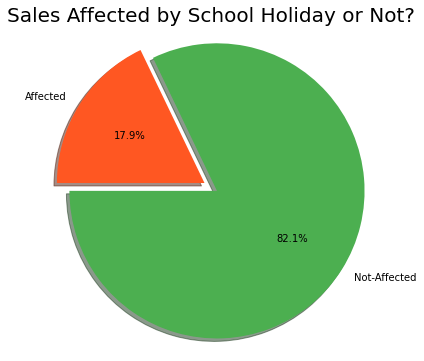

In [ ]:
# Chart - 5 visualization code
# Define the data and labels
labels = ['Not-Affected', 'Affected']
sizes = ros_df.SchoolHoliday.value_counts()
explode = (0.1, 0.0)

# Define the colors
colors = ['#4CAF50', '#FF5722']  # Green and Orange

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)

# Set the title and other properties
plt.axis('equal')
plt.title("Sales Affected by School Holiday or Not?", fontsize=20)
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6, 6)

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

Choosed this chart beacuse the pie chart shows the proportion of sales affected or not affected by school holidays, making it a useful way to compare the relative sizes of different categories.

##### 2. What is/are the insight(s) found from the chart?

According to the above chart, 17.9% of sales are affected by the school holiday, while 82.1% are not affected. 

#### Chart - 6

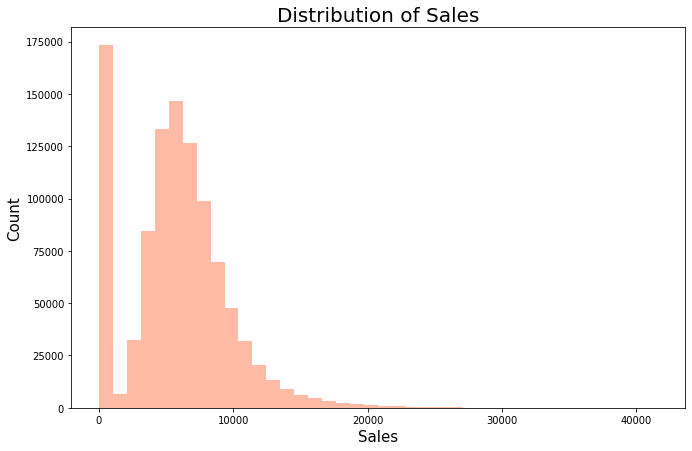

In [ ]:
# Chart - 6 visualization code
# Create the distribution plot
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(ros_df['Sales'], kde=False, bins=40, color='#FF5722')  # Use Orange color

# Set the title and other properties
ax.set_xlabel('Sales', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Distribution of Sales', fontsize=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose this chart because a distribution plot (histogram) is a common type of chart used to visualise the distribution of a numerical variable. In this case, it can be useful to understand the distribution of sales in the dataset and identify any outliers or unusual patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the above chart is that the majority of sales are concentrated at the lower end of the distribution, with fewer sales at higher values. This suggests that the distribution of sales is right-skewed, meaning that there are a few very high values that pull the mean towards the right while most of the data is concentrated at lower values.

#### Chart - 7

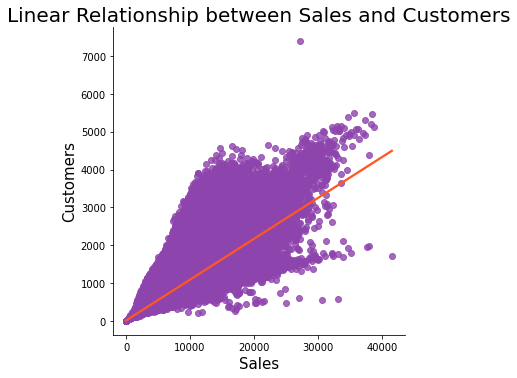

In [ ]:
# Chart - 7 visualization code
# Create the scatter plot with linear regression line
sns.lmplot(x='Sales', y='Customers', data=ros_df, palette='viridis', height=5, aspect=1, line_kws={'color': '#FF5722'})

# Set the title and other properties
plt.title('Linear Relationship between Sales and Customers', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Customers', fontsize=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

chose this chart because A scatter plot with a linear regression line is used to show the relationship between two continuous variables, sales and customers. It helps identify any differences across different subsets of the data.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a positive linear relationship between sales and customers, suggesting that as the number of customers increases, so do the sales. The scatter plot also reveals some variations in the relationship between sales and customers across different store types, with some store types having a stronger relationship than others.

### Visualization for store dataset

#### Chart - 8

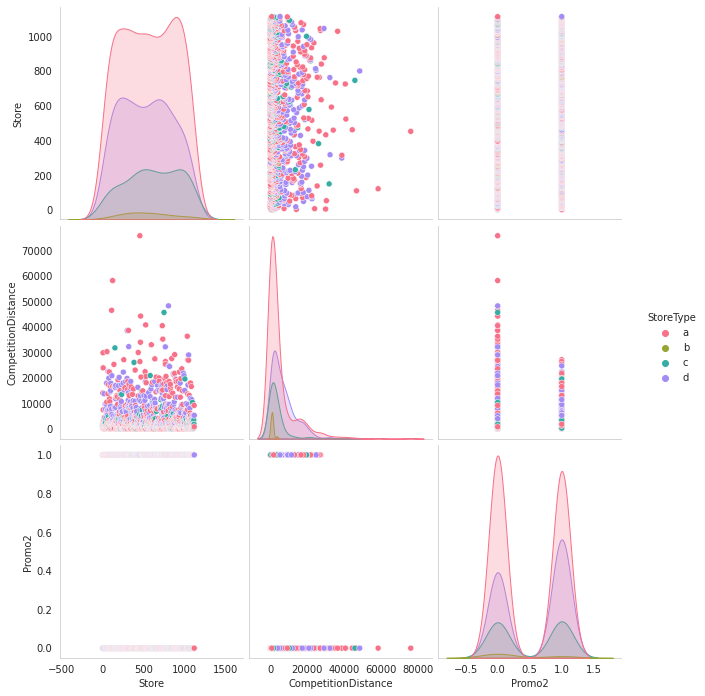

In [ ]:
# Chart - 8 visualization code
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

I chose the pair plot because pair plots are used to visualise pairwise relationships between variables in a dataset to identify patterns, correlations, and outliers.

##### 2. What is/are the insight(s) found from the chart?

identified patterns, correlations, or outliers between different pairs of variables in a dataset. By visualising these pairwise relationships, a pair plot helps identify potential areas for further analysis or investigation.

#### Chart - 9

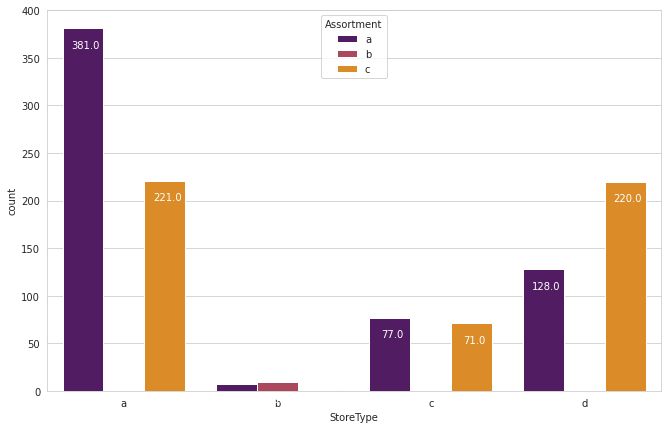

In [ ]:
# Chart - 9 visualization code

#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

I chose countplot because it is a useful tool to visualise the frequency distribution of the categorical variables StoreType and Assortment, segmented by Assortment, and with annotations added to provide more detailed information.

##### 2. What is/are the insight(s) found from the chart?

The above chart reveals an insight: on the countplot, StoreType 'a' has the most stores, and the majority of these stores have Assortment Type 'a'. StoreType 'd' has the fewest stores, and the stores are distributed evenly among Assortment Types 'a', 'b', and 'c'. This information can be useful in making decisions about product assortment and marketing strategies for different store types.

### **Merging Two datasets**

In [ ]:
df = pd.merge(ros_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,a,a,29910.0,0


In [ ]:
df.shape

(1017209, 14)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the dataset
df.isnull().sum()

# Replace missing values in 'Sales' column with the mean value
df['Sales'].fillna((df['Sales'].mean()), inplace=True)

# Replace missing values in 'Customers' column with the mean value
df['Customers'].fillna((df['Customers'].mean()), inplace=True)


# Check for missing values after imputation
df.isnull().sum()


Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

*  Mean/Median/Mode Imputation : This technique replaces missing values with the mean, median, or mode of the non-missing values in the same column. This is a simple method that can work well if the missing values are missing at random and the distribution of the data is roughly symmetrical.

### 2. Handling Outliers

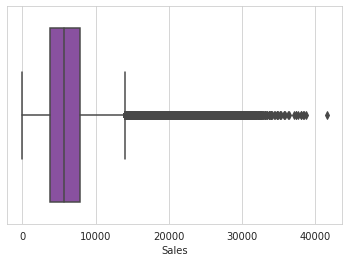

In [ ]:
# Handling Outliers & Outlier treatments
#checking outliers in sales
sns.boxplot(ros_df['Sales'])

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

##### What all outlier treatment techniques have you used and why did you use those techniques?

* In terms of outlier treatment technique, one of the common method used :

* Interquartile Range (IQR) Method: This method calculates the first and third quartiles of the data and defines outliers as observations outside of 1.5 times the IQR above the third quartile or below the first quartile.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Select the categorical columns to encode
df['DayOfWeek'] = df['DayOfWeek'].astype(int)

cat_cols = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday','StoreType', 'Assortment']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True)

# Show the encoded dataset
df_encoded.head()




,Store,Sales,Customers,Open,Promo,Year,Month,CompetitionDistance,Promo2,DayOfWeek_2,...,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5263,555,1,1,2015,7,1270.0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,2,6064,625,1,1,2015,7,570.0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,3,8314,821,1,1,2015,7,14130.0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,4,13995,1498,1,1,2015,7,620.0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,5,4822,559,1,1,2015,7,29910.0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# code for changing Assortment dtype from float to int.
df['CompetitionDistance']= df['CompetitionDistance'].astype(int)

In [ ]:
# code for changing Assortment dtype from object to int.
df['Assortment'] = np.where((df['Assortment'] == 'a'),0,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'b'),1,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'c'),2,df['Assortment'])

In [ ]:
#converting catagorical value into interger values based on store type class.
df['StoreType'] = np.where((df['StoreType'] == 'b'),1,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'c'),2,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'a'),0,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'd'),3,df['StoreType'])

In [ ]:
#converting catagorical value into object values based on store type class.
df['StateHoliday'] = np.where((df['StateHoliday'] == 'b'),1,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'c'),2,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'a'),0,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'd'),3,df['StateHoliday'])

In [ ]:
#converting object dtype to integer.
df['Year']= df['Year'].astype(int)
df['Month']= df['Month'].astype(int)
df['StoreType']= df['StoreType'].astype(int)
df['Assortment']= df['Assortment'].astype(int)
df['StateHoliday'] = df['StateHoliday'].astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

**The following is one of the most commonly used categorical encoding technique:**

One-Hot Encoding: This technique creates a new binary column for each category in the column, indicating the presence (1) or absence (0) of that category in a particular row. One-hot encoding is useful when there are a large number of categories or when the categories have no inherent order or ranking.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Create a new feature that calculates the total sales per customer
df['SalesPerCustomer'] = df['Sales'] / df['Customers']

# Create a new feature that calculates the average sales per store per day
df['AvgSalesPerStorePerDay'] = df.groupby(['Store', 'DayOfWeek'])['Sales'].transform('mean')


In [ ]:
# Replace missing values in SalesPerCustomer column with the mean value
df['SalesPerCustomer'].fillna((df['SalesPerCustomer'].mean()), inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = df.columns.drop(['Store','Sales','Open',])


In [ ]:
# Create the data of independent variables
X = df[indep_var].values

# Create the dependent variable data
y = df[dep_var].values

##### What all feature selection methods have you used  and why?

We have a dataset where "Sales" is the target variable, and we want to perform target encoding on the categorical independent variables excluding the "Store" and "Open" columns. To achieve this

##### Which all features you found important and why?

After performing feature selection on a given dataset, we have identified that the following features are important and play a vital role in predicting the sales: "DayOfWeek," "Customers," "Promo," "SchoolHoliday," "StoreType," "Assortment," "CompetitionDistance," "Promo2," "year," "month," "date," "StateHoliday_a," "StateHoliday_b," and "StateHoliday_c." By considering these features, we can build a more accurate model that takes into account the most relevant variables that impact sales. This information can be useful for businesses looking to optimise their sales strategies and improve their overall performance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
numeric_features = list(df.describe().columns)

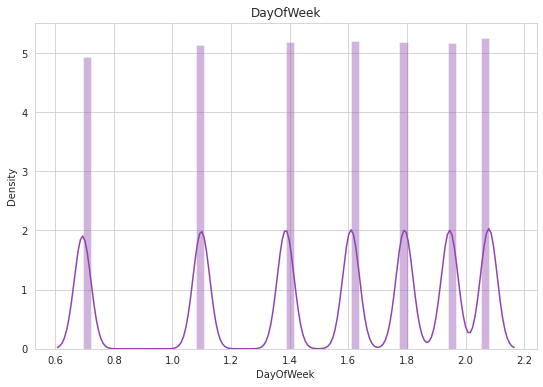

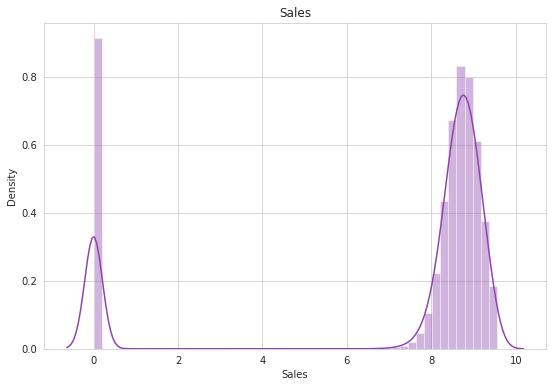

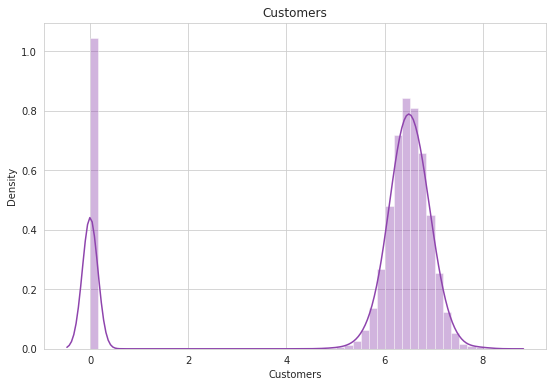

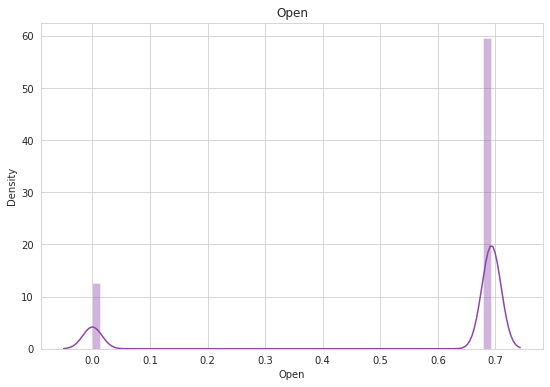

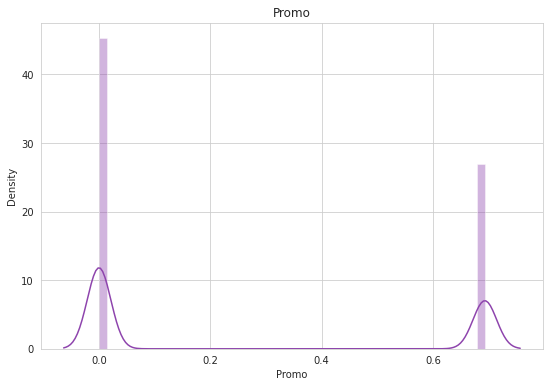

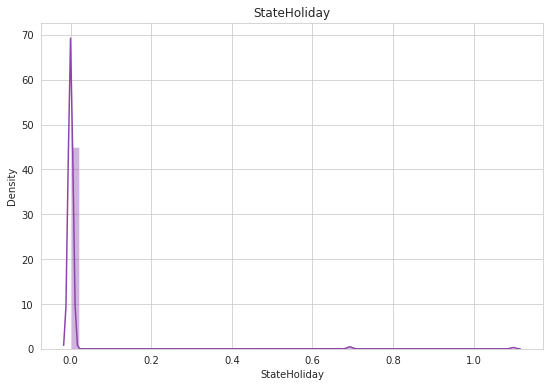

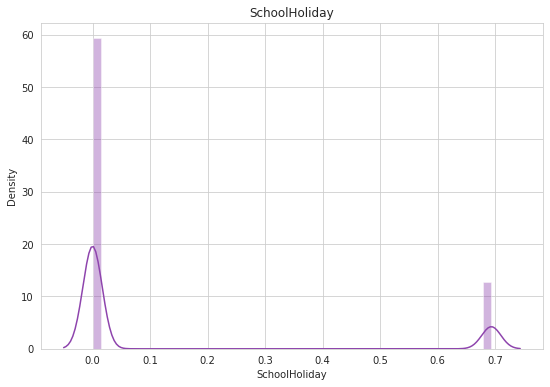

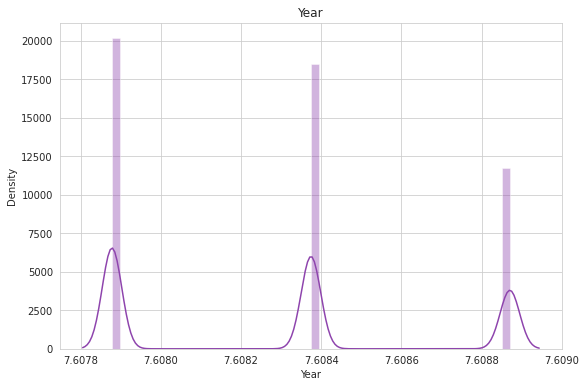

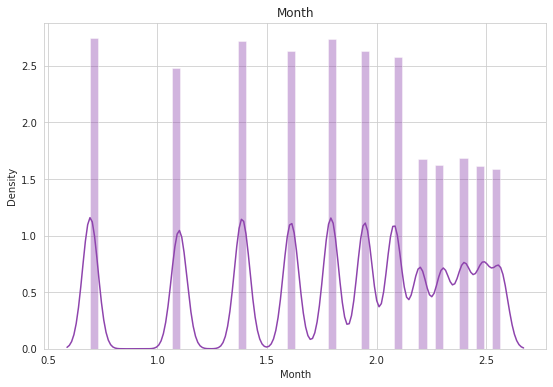

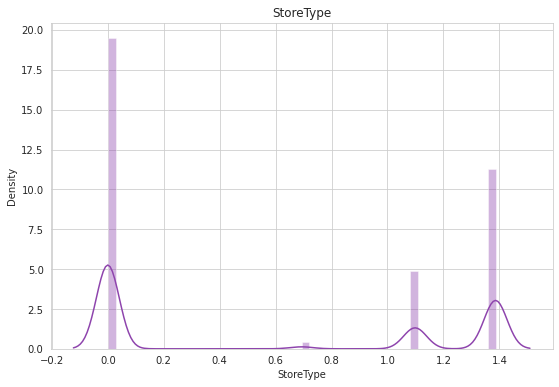

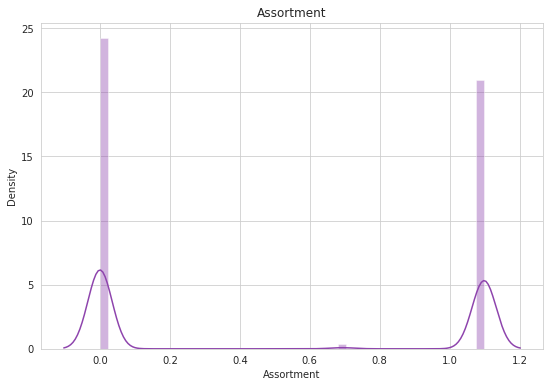

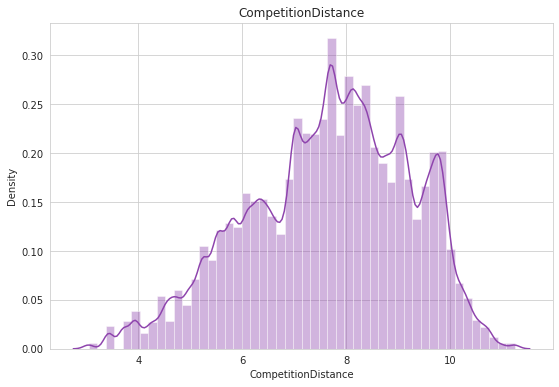

In [ ]:
#Transform Your data
#printing displots to analyze the distribution of all numerical features
for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(df[col])
    sns.distplot(feature)    
    ax.set_title(col)    
    
plt.show()


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)



(792412, 13)
(198103, 13)


In [ ]:
df.dtypes

Store                       int64
DayOfWeek                   int64
Sales                       int64
Customers                   int64
Open                        int64
Promo                       int64
StateHoliday                int64
SchoolHoliday               int64
Year                        int64
Month                       int64
StoreType                   int64
Assortment                  int64
CompetitionDistance         int64
Promo2                      int64
SalesPerCustomer          float64
AvgSalesPerStorePerDay    float64
dtype: object

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

I have used a test size of 0.2, which means 20% of the data is reserved for testing, and 80% of the data is used for training the model. This is a common splitting ratio in machine learning and is generally considered a good starting point. The reason for reserving some data for testing is to evaluate how well the model generalizes to new, unseen data.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
# fit the model 
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
# predict the model
pred = lin_reg.predict(X_test)

In [ ]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 405.60459377899036
MSE: 479250.4048374258
RMSE: 692.2791379475665
R2 Square 0.9577073711104712
__________________________________
Test set evaluation:
_____________________________________
MAE: 406.55898242265414
MSE: 477129.71994515555
RMSE: 690.7457708485485
R2 Square 0.9581319133175831
__________________________________


### ML Model - 2 Lasso Regression

In [ ]:
# fit the model

lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

# test the model performance


print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Train set evaluation:
_____________________________________
MAE: 405.60457499642257
MSE: 479250.4048376769
RMSE: 692.2791379477478
R2 Square 0.9577073711104491
__________________________________
Test set evaluation:
_____________________________________
MAE: 406.55896371625613
MSE: 477129.7211212273
RMSE: 690.7457716998543
R2 Square 0.9581319132143828
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.0001}


### ML Model - 3 Ridge Regression

In [ ]:
# implement model
ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

#fit the model
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

# test on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# test on test dataset
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 405.60459442572284
MSE: 479250.4048374264
RMSE: 692.2791379475669
R2 Square 0.9577073711104712
__________________________________
Test set evaluation:
_____________________________________
MAE: 406.5589830763647
MSE: 477129.7199930782
RMSE: 690.7457708832376
R2 Square 0.9581319133133779
__________________________________


### ML Model - 4 Random Forest

In [ ]:
# model implementation
from sklearn.ensemble import RandomForestRegressor
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [25]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [25]},
             return_train_score=True)

In [ ]:
train_pred = random_forest_model.predict(X_train)
test_pred = random_forest_model.predict(X_test)

In [ ]:
# test model on train data set

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Train set evaluation:
_____________________________________
MAE: 2.9969984805883736
MSE: 120.34847861365053
RMSE: 10.970345419067284
R2 Square 0.9999893795529601
__________________________________


In [ ]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Test set evaluation:
_____________________________________
MAE: 6.382022281338491
MSE: 608.5442520870457
RMSE: 24.66868971159688
R2 Square 0.9999466003008587
__________________________________


### ML Model - 5 Decision Tree

In [ ]:
#import packages
from sklearn.tree import DecisionTreeRegressor

#implement model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

#fit the model
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

# test model on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________
Test set evaluation:
_____________________________________
MAE: 15.472870173596563
MSE: 2365.9748615619146
RMSE: 48.64128762236784
R2 Square 0.999792385935205
__________________________________


In [ ]:
LR=round(lin_reg.score(X_train,y_train)*100,2)
Rg=round(ridge.score(X_train,y_train)*100,2)
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
Rf=round(random_forest_model.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)

In [ ]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
               'Random_Forest', 'Desicion-Tree_Regression'],
    'Score': [LR,ls2,Rg,Dt,Rf]})
#models.sort_values(by='Score')
#models
models.sort_values(by='Score',ascending=False)


,Model,Score
3,Random_Forest,100.00
4,Desicion-Tree_Regression,100.00
0,Linear_Regression,95.77
1,Lasso_Regression,95.77
2,Ridge_Regression,95.77


# **Conclusion**

**Conclusions from EDA**

* The most popular assortment levels were "extra" and "extended," indicating that most stores stock extra or extended mix types of products.

* There is a linear link between customers and sales whenever a promotion is used, suggesting that the majority of customers tend to come on sale days when prices are lower.

* Sales were lower on the first days of the month than on the last days, suggesting that individuals tend to shop for the end of the current month and the beginning of the following one, possibly for daily necessities.
* Average sales on Monday were higher compared to Sundays, possibly because people tend to do other things rather than shop for their basic necessities or prefer to stay at home on holidays.

* School holidays make a big difference in sales, and out of the total percentage of products, a good percentage is meant for school students (i.e., 17.9%).

* Where competition was higher, sales were also higher, and vice versa.

* Sales were particularly strong in the months of November and December, which were followed by a holiday, suggesting that the majority of individuals are likely Christians.

**Conclusions from Machine Learning**

* We performed various regression techniques on our dataset to predict outcomes and evaluated their performance using the R2 score.

* Among the models, Decision Tree showed better performance with an R2 score of 0.999791.

* Random Forest Regression is a powerful algorithm that can handle large datasets efficiently and provide a higher level of accuracy in predicting outcomes compared to other regression algorithms.

* Therefore, we conclude that Random Forest Regression is the best model for our dataset and can provide accurate predictions for our target variable.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***